In [2]:
import numpy as np
import pandas as pd
from PIL import Image as im
import shutil 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from subprocess import check_output

In [3]:
training_data= np.load('../Data/fashion_train.npy')
test_data= np.load('../Data/fashion_test.npy')
test_data1= np.load('../Data/fashion_test.npy')

# EDA

In [4]:
training_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

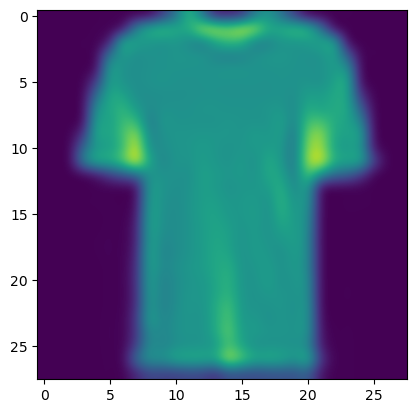

In [5]:
#printing the first image in the training dataset
first_photo=training_data[0,:-1]
#print(first_photo)
array = np.reshape(first_photo, (28, 28))
data = im.fromarray(array)
plt.imshow(data, interpolation = 'bicubic')

In [6]:
#loading the datasets into a panda's dataframes
train_df = pd.DataFrame(training_data)
test_df = pd.DataFrame(test_data)
print(train_df.shape)
train_df.head()

(10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,3,0,0,0,41,...,63,78,11,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,1,0,0,0,...,168,119,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,98,...,21,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,2,0,0,...,88,128,46,0,0,0,0,0,0,4


In [44]:
#renaming the last column- the label column
train_df.rename(columns = {784:'label'}, inplace = True)
test_df.rename(columns = {784:'label'}, inplace = True)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,label,filename
0,0,0,0,0,0,3,0,0,0,41,...,78,11,0,2,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,1,1,0,0,0,...,119,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,98,...,0,0,0,0,0,0,0,0,3,4
4,0,0,0,0,0,0,0,2,0,0,...,128,46,0,0,0,0,0,0,4,5


In [46]:
filename= list(range(1,10001))
filename1= list(range(1,5001))
train_df["filename"]=filename
test_df["filename"]=filename1
train_df

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,label,filename
0,0,0,0,0,0,3,0,0,0,41,...,78,11,0,2,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,1,1,0,0,0,...,119,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,98,...,0,0,0,0,0,0,0,0,3,4
4,0,0,0,0,0,0,0,2,0,0,...,128,46,0,0,0,0,0,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,8,0,141,117,32,...,137,161,117,0,0,0,0,0,4,9996
9996,0,0,0,0,0,1,1,1,4,0,...,7,0,2,0,0,0,0,0,0,9997
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,9998
9998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9999


In [9]:
#all the lables
labels = train_df.iloc[:,-1:]
labels

,filename
0,1
1,2
2,3
3,4
4,5
...,...
9995,9996
9996,9997
9997,9998
9998,9999


In [10]:
label_group_df = train_df[['filename','label']].groupby(['label']).count().reset_index()
label_group_df.columns=['label','count']
label_group_df_sorted=label_group_df.sort_values(by=['count'],ascending=False)
label_group_df_sorted

,label,count
0,0,2033
4,4,2014
3,3,2005
2,2,2001
1,1,1947


In [47]:
label_group_df1 = test_df[['filename','label']].groupby(['label']).count().reset_index()
label_group_df1.columns=['label','count']
label_group_df_sorted1=label_group_df1.sort_values(by=['count'],ascending=False)
label_group_df_sorted1

,label,count
0,0,1000
1,1,1000
2,2,1000
3,3,1000
4,4,1000


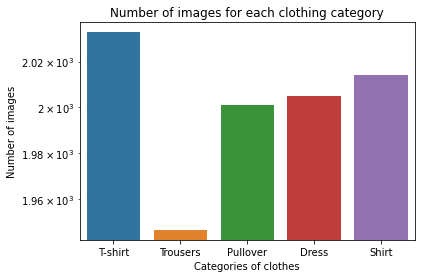

In [48]:
x_labels=["T-shirt", "Trousers", "Pullover", "Dress", "Shirt"] 

g=sns.barplot(x=label_group_df['label'],y=label_group_df['count'])
plt.title('Number of images for each clothing category')
g.set_yscale("log") #should we plot this in log scale so we can see the diffference better?

plt.xticks(ticks=label_group_df['label'], labels=x_labels)
g.set(xlabel="Categories of clothes", ylabel="Number of images")
plt.show()

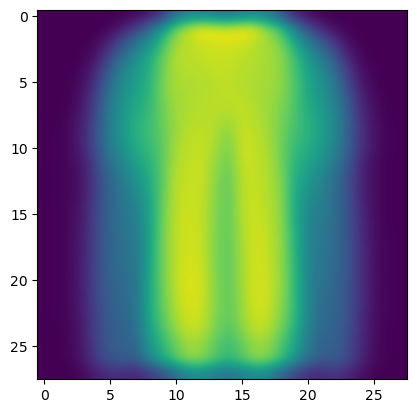

In [12]:
#Average Image
def average_image(df):
  
    df2 = df.iloc[: , :-2]
    av_column = df2.mean(axis=0)
    av_column = av_column.to_numpy()
    array = np.reshape(av_column, (28, 28))
    array = array.astype(np.uint8)
    avg_img = im.fromarray(array)
    return avg_img

#average_image(train_df)
plt.imshow(average_image(train_df), interpolation = 'bicubic')

In [13]:
#Average Images for each category
for l in range(0,5):
    mask = (train_df['label'] == l)
    df_mask = train_df[mask]
    average_image(df_mask).save("avg_image"+str(l)+".jpeg")

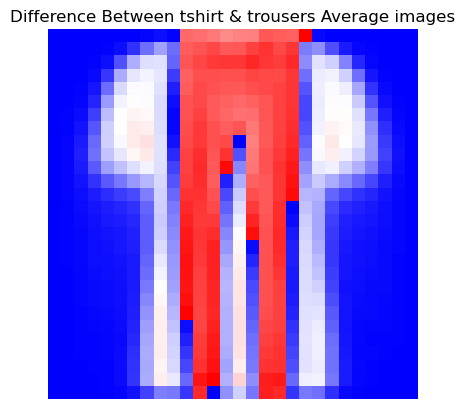

In [14]:
mask1 = (train_df['label'] == 0)
df_mask_tshirt = train_df[mask1]
df_mask_tshirt = df_mask_tshirt.iloc[: , :-2]
av_column = df_mask_tshirt.mean(axis=0)
av_column = av_column.to_numpy()
array1 = np.reshape(av_column, (28, 28))
array1 = array1.astype(np.uint8)
    
mask2 = (train_df['label'] == 1)
df_mask_trousers = train_df[mask2]
df_mask_trousers = df_mask_trousers.iloc[: , :-2]
av_column = df_mask_trousers.mean(axis=0)
av_column = av_column.to_numpy()
array2 = np.reshape(av_column, (28, 28))
array2 = array2.astype(np.uint8)

contrast =  array1 - array2
plt.imshow(contrast, cmap='bwr')
plt.title(f'Difference Between tshirt & trousers Average images')
plt.axis('off')
plt.show()

## Eigenimages

Lastly, we can use a dimension reduction technique such as the principal component analysis (PCA) to visualize the components that describe each class the best. The eigenimages, which is essentially the eigenvectors (components) of PCA of our image matrix, can be reshaped into a matrix and be plotted. It’s also called eigenfaces as this approach was first used for facial recognition research. Here we will visualize the principal components that describe 70% of variability for each class.

https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2

In [15]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, n_comp = 0.7, size = (28, 28)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca


train_df2 = train_df.iloc[: , :-2]
print(eigenimages(train_df2))


Number of PC:  9
PCA(n_components=0.7, whiten=True)


Number of PC:  9


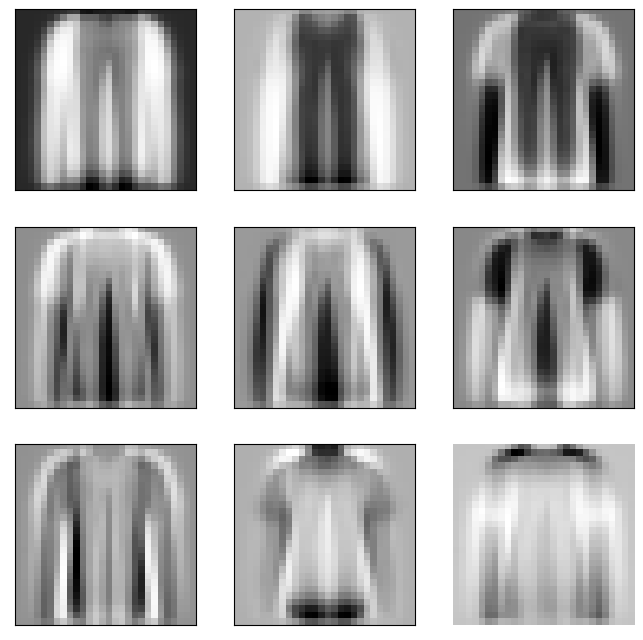

In [16]:
def plot_pca(pca, size = (28, 28)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()

plot_pca(eigenimages(train_df2))


##  PCA visualization

In [17]:
def pca(X, k):
    '''
    Function that does PCA dimensionality reduction.
    Takes in the data X, labels y and dimensions to reduce to, k.
    '''

    # Get means along the column
    size  = X.shape[1]
    means = X.mean(axis=0).reshape((1, size))

    # Shift around 0
    X_shift = X - means

    # Compute covariance matrix
    Cov = (X_shift.T @ X) / np.size(X_shift, 1)

    # Compute the eigenvalues and -vectors
    w, v = np.linalg.eig(Cov)

    # Sort them in order
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]

    # Take the first 'k' eigenvectors
    W_k = v[:, 0:k]

    # Project on to new subspace
    z_k = W_k.T @ X_shift.T

    return list(z_k)

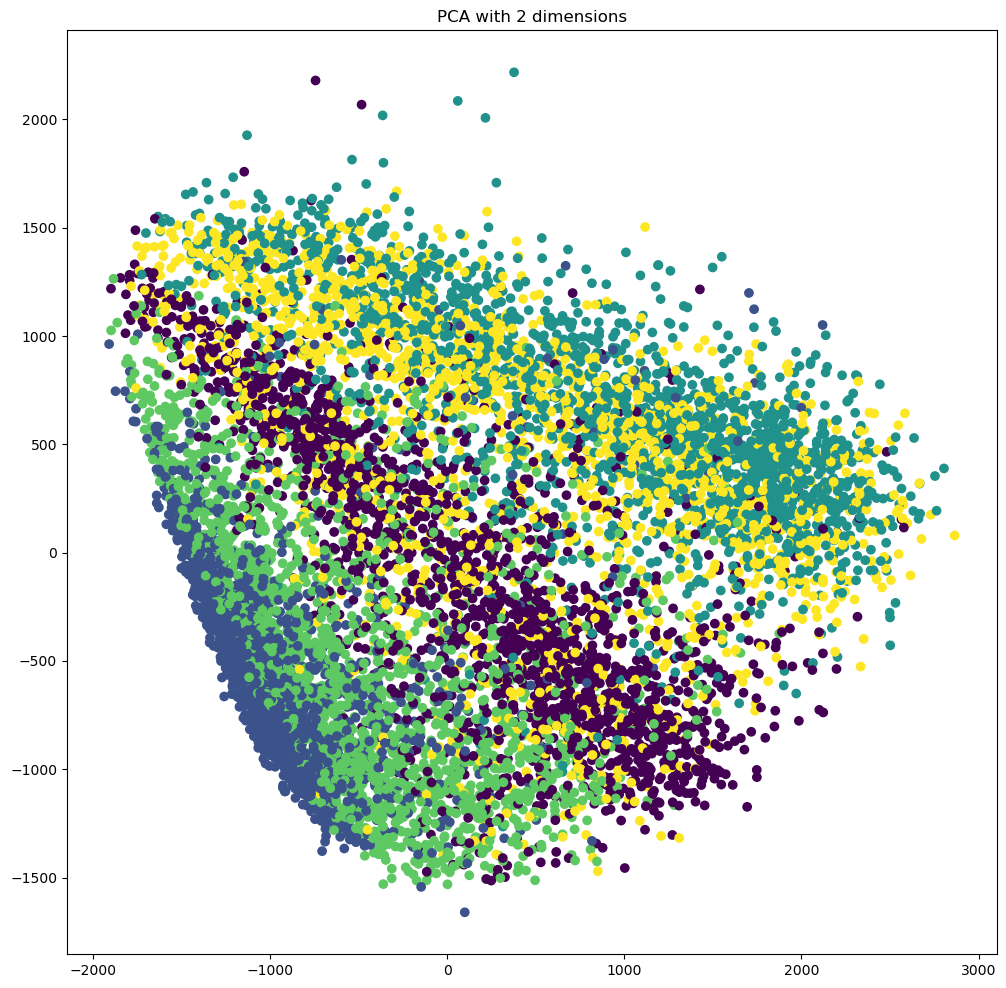

In [18]:
fashion_train = np.load('../Data/fashion_train.npy')
X_train = fashion_train[:, :-1]
y_train = fashion_train[:, -1]
[x, y] = pca(X_train, 2)

fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.scatter(x, y, label = y_train, c = y_train)
plt.title('PCA with 2 dimensions');

In [19]:
# Covariance
np.set_printoptions(precision=3)
cov = np.cov(X_train.transpose())

# Eigen Values
EigVal,EigVec = np.linalg.eig(cov)

# Ordering Eigen values and vectors
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]

#Projecting data on Eigen vector directions resulting to Principal Components 
 #cross product
PC = np.matmul(X_train,EigVec)
PC

array([[ 2.288e+03, -1.475e+03, -4.528e+02, ..., -1.440e-02,  2.220e-04,
         3.630e-03],
       [ 7.397e+02, -1.358e+03,  5.167e+02, ..., -9.516e-03,  1.615e-02,
        -5.986e-03],
       [ 2.684e+03, -1.895e+03, -5.619e+02, ...,  1.834e-02,  1.296e-02,
        -5.040e-03],
       ...,
       [ 1.511e+03, -2.623e+03,  5.967e+02, ...,  1.197e-02,  1.652e-02,
         9.502e-03],
       [ 2.232e+03, -1.761e+03, -3.958e+02, ...,  1.519e-02,  2.715e-02,
        -1.285e-02],
       [ 1.477e+03, -1.738e+03,  1.525e+01, ...,  2.638e-02,  5.223e-03,
         1.952e-03]])

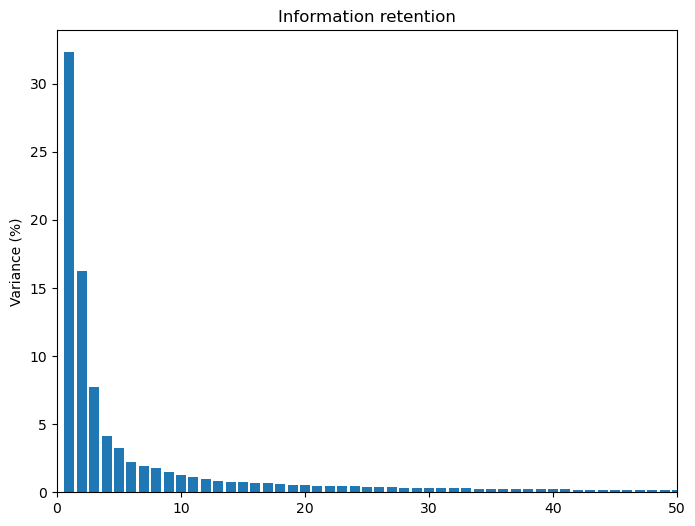

In [20]:
#Information Retained by the first 50 Principal Components

plt.figure(figsize=(8,6))
x=list(range(1,785))

plt.bar(x,EigVal/sum(EigVal)*100,align='center')
plt.xlim([0, 50])
plt.ylabel('Variance (%)')
plt.title('Information retention');

## DATA PREPARATION

In [21]:
#data preparation for analysis:

'''The normalization is done in this part so we can use it in
data preparation, we used tensorflow keras utils normalize'''

training_data1=training_data[:,:-1]
test_data2=test_data1[:,:-1]
training_data1=tf.keras.utils.normalize(training_data1,axis=1)
test_data2=tf.keras.utils.normalize(test_data2,axis=1)

def data_preparation(train_row,test_data1):
    '''data preparation for analysis: Creating list of tuples shape (x,y), 
    where x is a (784,1) shaped numpy array, and y is the
    resulting classification component for each input'''
    
    train_input=[np.reshape(x, (784, 1)) for x in training_data1]
    train_output=[v_output(x) for x in training_data[:,-1]]
    
    test_input=[np.reshape(x, (784, 1)) for x in test_data2]
    test_output=[x for x in test_data1[:,-1]]

    return (train_input,train_output,test_input,test_output)

def v_output(v):
    '''Returns a 5 dimesional vector consisting of a 1 at the v
    position and 0 elsewhere to correcpond to classes (0,1,2,3,4)'''
    
    n=np.zeros((5,1))
    n[v]=1.0
    return n
    

# Neural network

In [22]:
#Activation functions: 

'''the implementation of the sigmoid function, would be better if we used softmax, maybe if we have
time ill implement'''

def sigmoid(x):
    s=1.0/(1.0+np.exp(-x))
    return s

def derivative_sigmoid(x):
    s=sigmoid(x)*(1-sigmoid(x))
    return s

In [23]:
class Feed_forward(object):
    
    def __init__(self, layer_sizes):
        
        '''Initializing the feed foreward object, number of layers and their size from input,
        The biases are initialised randomly from a normal distribution withing the numpy random library with dimensions
        of (layer size,1). The weights in a similar way from the distribution but size (x,y) from the layers'''
        
        self.num_layers = len(layer_sizes)
        self.sizes = layer_sizes
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        
    def feed(self, a):
        
        '''Feed forward propagation using the activaction function (this case sigmoid) on the weights,
        biases and actviations, returns network output for a specific activation input'''
        
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def update(self, batch, learning_rate):
        
        '''This uses gradient descent backpropagation to update the weights and biases. We use it
        on batches of the data itself not the whole thing'''
        
        n_b = [np.zeros(b.shape) for b in self.biases]
        n_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in batch:
            delta_b, delta_w = self.backprop(x, y)
            n_b = [nb+dnb for nb, dnb in zip(n_b, delta_b)]
            n_w = [nw+dnw for nw, dnw in zip(n_w, delta_w)]
            
        self.weights = [w-(learning_rate/len(batch))*nw
                        for w, nw in zip(self.weights, n_w)]
        self.biases = [b-(learning_rate/len(batch))*nb
                       for b, nb in zip(self.biases, n_b)]

    def backprop(self, x, y):
        
        '''Returns the gradient for the cost function C_x, in the form of a tuple, which are stored as
        as numpy arrays in a list for each layer'''
        
        n_b = [np.zeros(b.shape) for b in self.biases]
        n_w = [np.zeros(w.shape) for w in self.weights]
        z_vectors = []
        #feed
        activation = x
        activations = [x]
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            z_vectors.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        #back
        delta = self.cost_derivative(activations[-1], y) * \
            derivative_sigmoid(z_vectors[-1])
        n_b[-1] = delta
        n_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = z_vectors[-l]
            sp = derivative_sigmoid(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            n_b[-l] = delta
            n_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (n_b, n_w)

    def evaluate(self, test_data):
        '''Returns the number of results for which the test is correct, we check if the highest class corresponds
        to the position containing 1 in the correct class vector'''
        test_results = [(np.argmax(self.feed(x)), y)
                        for (x, y) in test_data]
        correct_count=sum(int(x == y) for (x, y) in test_results)
        return correct_count

    def cost_derivative(self, output_activations, y):
        '''Returns cost derivative vector'''
        return (output_activations-y)
    
  
    
    def SGD(self, training_data, runs, batch_size, learning_rate,result_list,
            test_data):
        '''Network training, batch stochastic gradient descent,and checks the test data , prints out the correect 
        number against total number, and saves the correct scores for each run in the result_list'''
        n = len(training_data)
        n_test = len(test_data)

        for j in range(runs):
            random.shuffle(training_data)
            batches = [
                training_data[k:k+batch_size]
                for k in range(0, n, batch_size)]
            for batch in batches:
                self.update(batch, learning_rate)
            if test_data:
                print("Run {} : {} / {}".format(j,self.evaluate(test_data),n_test))
                result_list.append(self.evaluate(test_data))
            else:
                print("Run {} complete".format(j))
            

    

In [24]:
train_input,train_output,test_input,test_output=data_preparation(training_data,test_data1)
test=list(zip(test_input,test_output))
train=list(zip(train_input,train_output))


## Testing

In [77]:
net = Feed_forward([784, 30, 5])
result_list0=[]
net.SGD(train, 30, 25, 2.5,result_list0,test)

Run 0 : 3724 / 5000
Run 1 : 3847 / 5000
Run 2 : 3874 / 5000
Run 3 : 3937 / 5000
Run 4 : 3966 / 5000
Run 5 : 3944 / 5000
Run 6 : 4011 / 5000
Run 7 : 4032 / 5000
Run 8 : 4014 / 5000
Run 9 : 4047 / 5000
Run 10 : 4041 / 5000
Run 11 : 4048 / 5000
Run 12 : 4022 / 5000
Run 13 : 4070 / 5000
Run 14 : 4031 / 5000
Run 15 : 4081 / 5000
Run 16 : 4103 / 5000
Run 17 : 4099 / 5000
Run 18 : 4111 / 5000
Run 19 : 4111 / 5000
Run 20 : 4120 / 5000
Run 21 : 4111 / 5000
Run 22 : 4116 / 5000
Run 23 : 4115 / 5000
Run 24 : 4119 / 5000
Run 25 : 4127 / 5000
Run 26 : 4150 / 5000
Run 27 : 4106 / 5000
Run 28 : 4140 / 5000
Run 29 : 4152 / 5000


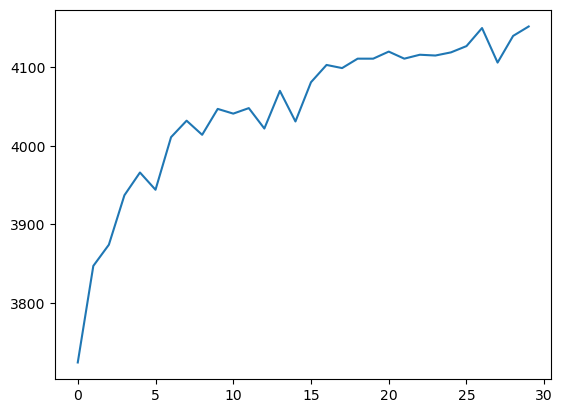

In [78]:
plt.plot(result_list0)
plt.show()

In [75]:
net = Feed_forward([784, 30, 5])
result_list1=[]
net.SGD(train, 30, 32, 2.5,result_list1,test)

Run 0 : 3622 / 5000
Run 1 : 3750 / 5000
Run 2 : 3820 / 5000
Run 3 : 3862 / 5000
Run 4 : 3953 / 5000
Run 5 : 3941 / 5000
Run 6 : 3968 / 5000
Run 7 : 3987 / 5000
Run 8 : 4003 / 5000
Run 9 : 4027 / 5000
Run 10 : 4032 / 5000
Run 11 : 3938 / 5000
Run 12 : 4071 / 5000
Run 13 : 4092 / 5000
Run 14 : 4104 / 5000
Run 15 : 4026 / 5000
Run 16 : 4074 / 5000
Run 17 : 4008 / 5000
Run 18 : 4121 / 5000
Run 19 : 4095 / 5000
Run 20 : 4101 / 5000
Run 21 : 4113 / 5000
Run 22 : 4067 / 5000
Run 23 : 3964 / 5000
Run 24 : 4121 / 5000
Run 25 : 4136 / 5000
Run 26 : 4140 / 5000
Run 27 : 4140 / 5000
Run 28 : 4145 / 5000
Run 29 : 4056 / 5000


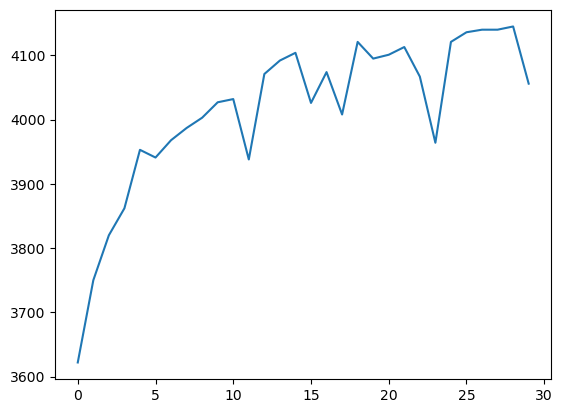

In [76]:
plt.plot(result_list1)
plt.show()

In [71]:
net = Feed_forward([784, 20, 5])
result_list2=[]
net.SGD(train, 30, 10, 2.5,result_list2,test)


Run 0 : 3836 / 5000
Run 1 : 3967 / 5000
Run 2 : 3998 / 5000
Run 3 : 4008 / 5000
Run 4 : 4014 / 5000
Run 5 : 4056 / 5000
Run 6 : 3962 / 5000
Run 7 : 4093 / 5000
Run 8 : 4090 / 5000
Run 9 : 4122 / 5000
Run 10 : 4141 / 5000
Run 11 : 4142 / 5000
Run 12 : 4067 / 5000
Run 13 : 4095 / 5000
Run 14 : 4130 / 5000
Run 15 : 4137 / 5000
Run 16 : 4171 / 5000
Run 17 : 4193 / 5000
Run 18 : 4180 / 5000
Run 19 : 4159 / 5000
Run 20 : 4190 / 5000
Run 21 : 4195 / 5000
Run 22 : 4120 / 5000
Run 23 : 4190 / 5000
Run 24 : 4205 / 5000
Run 25 : 4211 / 5000
Run 26 : 4167 / 5000
Run 27 : 4216 / 5000
Run 28 : 4223 / 5000
Run 29 : 4234 / 5000


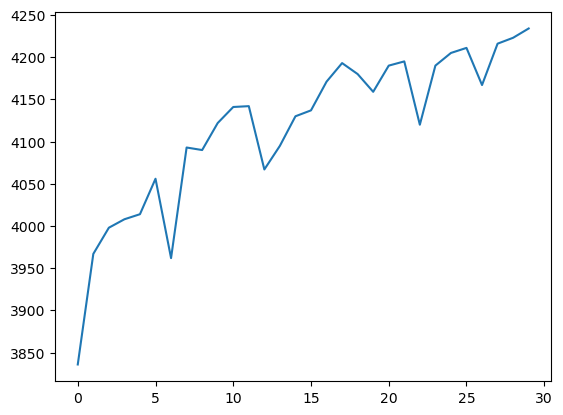

In [72]:
plt.plot(result_list2)
plt.show()

In [54]:
net = Feed_forward([784, 30, 5])
result_list3=[]
net.SGD(train, 30, 10, 4,result_list3,test)


Run 0 : 3841 / 5000
Run 1 : 3979 / 5000
Run 2 : 4012 / 5000
Run 3 : 4057 / 5000
Run 4 : 3938 / 5000
Run 5 : 4083 / 5000
Run 6 : 4051 / 5000
Run 7 : 4127 / 5000
Run 8 : 4134 / 5000
Run 9 : 4135 / 5000
Run 10 : 4111 / 5000
Run 11 : 4155 / 5000
Run 12 : 4082 / 5000
Run 13 : 4152 / 5000
Run 14 : 4147 / 5000
Run 15 : 4182 / 5000
Run 16 : 4128 / 5000
Run 17 : 4201 / 5000
Run 18 : 4195 / 5000
Run 19 : 4194 / 5000
Run 20 : 4191 / 5000
Run 21 : 4196 / 5000
Run 22 : 4215 / 5000
Run 23 : 4169 / 5000
Run 24 : 4203 / 5000
Run 25 : 4202 / 5000
Run 26 : 4207 / 5000
Run 27 : 4143 / 5000
Run 28 : 4190 / 5000
Run 29 : 4152 / 5000


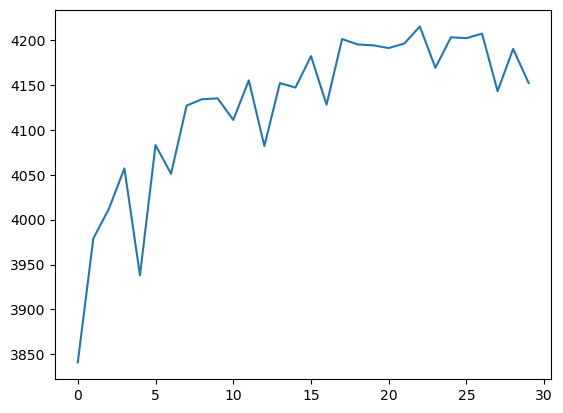

In [55]:
plt.plot(result_list3)
plt.show()

In [59]:
net = Feed_forward([784, 30, 5])
result_list4=[]
net.SGD(train, 30, 10, 9,result_list4,test)

Run 0 : 3835 / 5000
Run 1 : 3773 / 5000
Run 2 : 3959 / 5000
Run 3 : 3988 / 5000
Run 4 : 3983 / 5000
Run 5 : 4131 / 5000
Run 6 : 4052 / 5000
Run 7 : 4095 / 5000
Run 8 : 4117 / 5000
Run 9 : 4186 / 5000
Run 10 : 4158 / 5000
Run 11 : 4182 / 5000
Run 12 : 4178 / 5000
Run 13 : 4202 / 5000
Run 14 : 4205 / 5000
Run 15 : 4076 / 5000
Run 16 : 4194 / 5000
Run 17 : 4205 / 5000
Run 18 : 4146 / 5000
Run 19 : 4216 / 5000
Run 20 : 4197 / 5000
Run 21 : 4199 / 5000
Run 22 : 4247 / 5000
Run 23 : 4200 / 5000
Run 24 : 4251 / 5000
Run 25 : 4183 / 5000
Run 26 : 4164 / 5000
Run 27 : 4148 / 5000
Run 28 : 4251 / 5000
Run 29 : 4246 / 5000


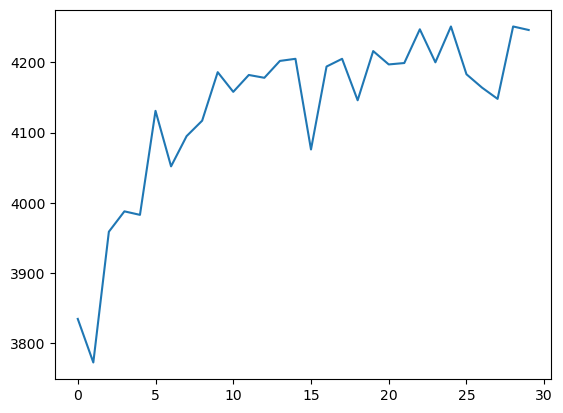

In [60]:
plt.plot(result_list4)
plt.show()

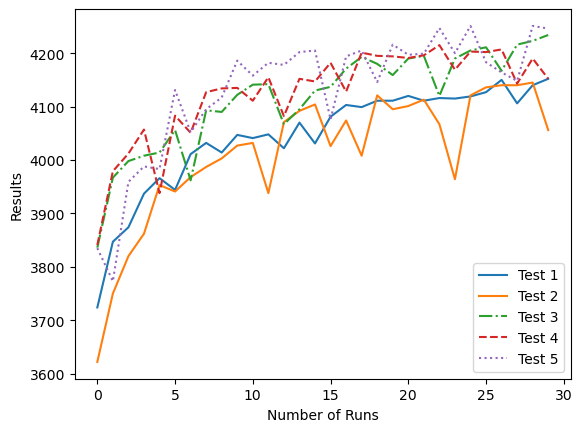

In [84]:
plt.plot(result_list0, label = "Test 1")
plt.plot(result_list1, label = "Test 2", linestyle="-")
plt.plot(result_list2, label = "Test 3", linestyle="-.") 
plt.plot(result_list3, label = "Test 4", linestyle="--")
plt.plot(result_list4, label = "Test 5", linestyle=":")
plt.legend()
plt.xlabel('Number of Runs')
plt.ylabel('Results')
plt.show()

In [ ]:
#Reference method

model = Sequential()
batch_size = 128
hidden_units = 256
dropout = 0.45

model = Sequential()
model.add(Dense(hidden_units, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('sigmoid'))
model.add(Dropout(dropout))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD',
              metrics=['accuracy'])


In [ ]:
model.fit(np.array([x for x in training_data1]),np.array(train_output) , epochs=20, batch_size=batch_size)

# Support vector machine

In [27]:
clf = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
clf.fit([x for x in training_data1], [x for x in training_data[:,-1]])
y_pred = clf.predict([x for x in test_data2])

In [28]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score([x for x in test_data1[:,-1]], y_pred))

Accuracy: 0.8612


In [29]:
print("Precision:",metrics.precision_score([x for x in test_data1[:,-1]], y_pred,average='weighted'))
print("Recall:",metrics.recall_score([x for x in test_data1[:,-1]], y_pred,average='weighted'))

Precision: 0.8602124313504311
Recall: 0.8612


In [30]:
#Confusion matrix
cm_poly = confusion_matrix([x for x in test_data1[:,-1]], y_pred)
print(cm_poly)

[[846   0  17  32 105]
 [  3 971   1  21   4]
 [ 12   1 879  21  87]
 [ 30   6  12 921  31]
 [153   1 121  36 689]]


# Decision tree

In [39]:
#We will defo change things here but not in the sense of the algorythm itself
classes=np.array([0,1,2,3,4])

In [40]:
# I used this short data to train...to slow on the whole on my laptop
number_of_rows = training_data.shape[0]
random_indices = np.random.choice(number_of_rows, size=9000, replace=False)
train_row = training_data[random_indices, :]
validation_row=np.delete(training_data, random_indices, 0)
print(train_row)
np.shape(validation_row)
validation=tf.keras.utils.normalize([x for x in validation_row[:,:-1]],axis=1)

[[0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 3]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 1]]


In [41]:
class DecisionTree:
    def __init__(self, X, y, max_depth=2, min_leaf_size=1, depth=0, classes=None):
        self.X = np.array(X)
        self.y = np.array(y)
        self.N = self.X.shape[0]  # the number of samples
        self.depth = depth 
        self.min_leaf_size=min_leaf_size
 
        self.set_possible_classes()
 
        # Most frequent class in the current node.
        self.prediction = self.classes[np.argmax(self.class_count)]
 
        # Gini impurity for the current node.
        class_ratios = self.class_count / self.N
        self.gini = 1 - np.sum(class_ratios**2)
 
    
        if (depth == max_depth) or (self.gini == 0):
            self.axis = None
            self.t = None
            self.left = None
            self.right = None
            return
 
        self.make_tree(max_depth)
 
    def set_possible_classes(self):
        # Creating a list of possible classes.
        if classes is None:
            self.classes = np.unique(self.y)
        else:
            self.classes = classes
 
        # Number of samples of each class present in the current node.
        self.class_count = []
        for i in self.classes:
            self.class_count.append(np.sum(i == self.y))
        self.class_count = np.array(self.class_count)
 
    def make_tree(self,max_depth):
        mgini = 2
        self.axis = 0
        self.t = 0
 
        for k in range(self.X.shape[1]):
            col_values = self.X[:, k].copy()
            col_values = np.sort(col_values)
 
            for j in range(len(col_values)):
                sel = self.X[:, k] <= col_values[j]
                n_left = np.sum(sel)
                n_right = np.sum(~sel)
 
                if (n_left >= self.min_leaf_size) & (n_right >= self.min_leaf_size):
                    _, left_counts = np.unique(self.y[sel], return_counts=True)
                    class_ratios = left_counts / n_left
                    left_gini = 1 - np.sum((class_ratios**2))
 
                    _, right_counts = np.unique(self.y[~sel], return_counts=True)
                    class_ratios = right_counts / n_right
                    right_gini = 1 - np.sum((class_ratios**2))
                    gini = (n_left * left_gini + n_right * right_gini) / (
                        n_left + n_right
                    )
 
                    if gini <= mgini:
                        mgini = gini
                        self.axis = k
                        if (j + 1) == len(col_values):
                            self.t = col_values[j]
                        else:
                            self.t = (col_values[j] + col_values[j + 1]) / 2
 
        sel = self.X[:, self.axis] <= self.t
 
        if (
            (mgini == 2)
            or (np.sum(sel) < self.min_leaf_size)
            or (np.sum(~sel) < self.min_leaf_size)
        ):
            self.axis = None
            self.t = None
            self.left = None
            self.right = None
            return
 
        self.left = DecisionTree(
            self.X[sel, :],
            self.y[sel],
            max_depth,
            self.min_leaf_size,
            self.depth + 1,
            self.classes,
        )
        self.right = DecisionTree(
            self.X[~sel, :],
            self.y[~sel],
            max_depth,
            self.min_leaf_size,
            self.depth + 1,
            self.classes,
        )
 
    def classify(self, row):
        row = np.array(row)
 
        if self.left == None or self.right == None:
            return self.prediction
 
        if row[self.axis] <= self.t:
            return self.left.classify(row)
        else:
            return self.right.classify(row)
 
    def predict_class(self, X):
        self.X = np.array(X)
        predictions = []
 
        for i in range(0, len(X)):
            row = self.X[i, :]
            predictions.append(self.classify(row))
 
        predictions = np.array(predictions)
        return predictions
 
    def accuracy(self, X, y):
        X = np.array(X)
        y = np.array(y)
        N = X.shape[0]
        y_pred = self.predict_class(X)
        accuracy = (np.sum(y == y_pred)) / N
        return accuracy
 

In [42]:
tree2 = DecisionTree(validation, [x for x in validation_row[:,-1]], max_depth=15, min_leaf_size=15,classes=classes)

In [43]:
print('Training Accuracy:  ', tree2.accuracy(validation,  [x for x in validation_row[:,-1]]))
print('Test Accuracy:', tree2.accuracy([x for x in test_data2], [x for x in test_data1[:,-1]]))

Training Accuracy:   0.858
Test Accuracy: 0.7572


In [49]:
#Reference method:
# Partition data
X = training_data[:, :-1]
Y = training_data[:, -1]
print("Shapes of X:", X.shape, "and Y:", Y.shape)
X_test = test_data1[:, :-1]
Y_test = test_data1[:, -1]
print("Shapes of X_test:", X_test.shape, "and Y_test:", Y_test.shape)

Shapes of X: (10000, 784) and Y: (10000,)
Shapes of X_test: (5000, 784) and Y_test: (5000,)


In [50]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [51]:
clf.score(X_test, Y_test)

0.7682